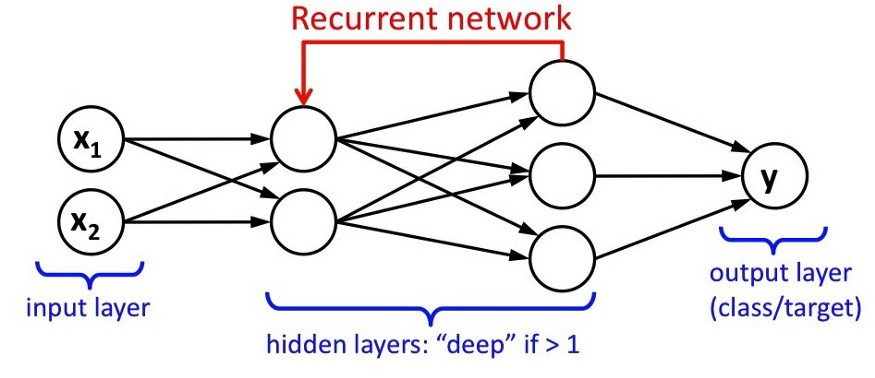
```
The Recurrent neural networks are a class of artificial neural networks where the connection between nodes form a directed graph along a temporal sequence.

Unlike the feed-forward neural networks, the recurrent neural networks use their internal state memory for processing sequences.

This dynamic behavior of the Recurrent neural networks allows them to be very useful and applicable to audio analysis, handwritten recognition, and several such applications.
```

## Simple RNN Implementation in TensorFlow
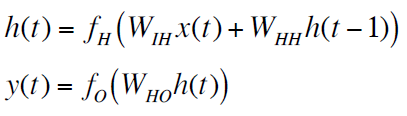
```
Where x(t) and y(t) are the input and output vectors, Wᵢₕ, Wₕₕ, and Wₕₒ are the weight matrices and fₕ and fₒ are the hidden and output unit activation functions.

The implementation of RNN with 2 Simple RNN layers each with 32 RNN cells followed by time distribute dense layers for 10 class classification can be illustrated as follows:
```

In [17]:
import tensorflow as tf
import tensorflow.keras.layers as layers

def RNN(_rnn_nb, _fc_nb):
    spec_start = layers.Input((256, 256))
    spec_x = spec_start
    
    for _r in _rnn_nb:
        spec_x = layers.SimpleRNN(_r, activation='tanh', dropout=dropout_rate,
                                           recurrent_dropout=dropout_rate, return_sequences=True)(spec_x)
        
    for _f in _fc_nb:
        spec_x = layers.TimeDistributed(tf.keras.layers.Dense(10))(spec_x)
        out = layers.Activation('sigmoid', name='strong_out')(spec_x)
        
    _model = tf.keras.Model(inputs=spec_start, outputs=out)
    _model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    _model.summary()
    return _model

In [18]:
rnn_nb = [32, 32] # Number of RNN nodes. Length of rnn_nb = number of RNN layers
fc_nb = [32] # Number of FC nodes. Length of fc_nb = number of FC layers
dropout_rate = 0.5 # Dropout after each layer

In [19]:
RNN(rnn_nb, fc_nb)

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256)]        0         
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 256, 32)           9248      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 256, 32)           2080      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 256, 10)           330       
_________________________________________________________________
strong_out (Activation)      (None, 256, 10)           0         
Total params: 11,658
Trainable params: 11,658
Non-trainable params: 0
_________________________________________________________________


## LSTM implementation in TensorFlow
```
LSTM, also known as the Long Short Term Memory in an RNN architecture with feedback connections, which enables it to perform or compute anything that a Turing machine can.

A single LSTM unit is composed of a cell, an input gate, an output gate and a forget gate, which facilities the cell to remember values of an arbitrary amount of time. The gates control the flow of information in and out the LSTM cell.

The hidden state hₜ for an LSTM cell can be calculated as follows:
```
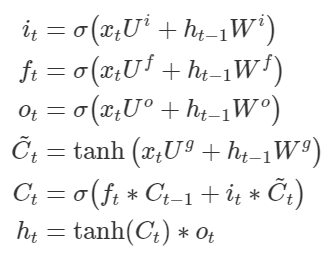

```
Here i, f, o are called the input, forget and output gates respectively. Note that they have the exact same equations, just with different parameter matrices (W is the recurrent connection at the previous hidden layer and  current hidden layer, U is the weight matrix connecting the inputs to the current hidden layer).
```

```
The Keras Implementation of LSTM with 2 layers of 32 LSTM cells for the above-mentioned task of 10 class classification can be illustrated as follows:
```

In [20]:
def LSTM(_rnn_nb, _fc_nb):
    spec_start = tf.keras.layers.Input((256, 256))
    spec_x = spec_start
    
    for _f in _fc_nb:
        spec_x = layers.TimeDistributed(tf.keras.layers.Dense(_f))(spec_x)
        spec_x = layers.Dropout(dropout_rate)(spec_x)
        
    spec_x = layers.TimeDistributed(tf.keras.layers.Dense(10))(spec_x)
    out = layers.Activation('sigmoid', name='strong_out')(spec_x)
    
    
    model = tf.keras.Model(inputs=spec_start, outputs=out)
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    model.summary()
    return model

In [21]:
rnn_nb = [32, 32] # Number of RNN nodes. Length of rnn_nb = number of RNN layers
fc_nb = [32] # Number of FC nodes. Length of fc_nb = number of FC layers 

dropout_rate = 0.5 # Dropout after each layer

In [22]:
LSTM(rnn_nb, fc_nb)

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 256, 256)]        0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 256, 32)           8224      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256, 32)           0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 256, 10)           330       
_________________________________________________________________
strong_out (Activation)      (None, 256, 10)           0         
Total params: 8,554
Trainable params: 8,554
Non-trainable params: 0
_________________________________________________________________


## GRU implementation in TensorFlow

```
The GRU, known as the Gated Recurrent Unit is an RNN architecture, which is similar to LSTM units. The GRU comprises of the reset gate and the gate instead of the input, output and forget gate of the LSTM.

The reset gate determines how to combine the new input with previous memory, and the update gate defines how much of the previous memory to keep around. If we set the reset to all 1's and update gate to all 0's we again arrive at our plain RNN model.

For the GRU the hidden state hₜ can be calculated as follows:
```

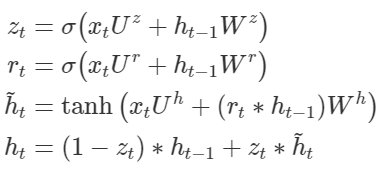

```
Here r is a reset gate, and z is an update gate.
The implementation of the GRU can be illustrated as follows"
```

In [26]:
def GRU(rnn_nb, fc_nb):
    spec_start = layers.Input((256, 256))
    spec_x = spec_start
    for _r in rnn_nb:
        spec_x = layers.GRU(_r, activation='tanh', dropout=dropout_rate, recurrent_dropout=dropout_rate, 
                            return_sequences=True)(spec_x)
        
    for _f in fc_nb:
        spec_x = layers.TimeDistributed(layers.Dense(_f))(spec_x)
        spec_x = layers.Dropout(dropout_rate)(spec_x)
    
    spech_x = layers.TimeDistributed(layers.Dense(10))(spec_x)
    out = layers.Activation('sigmoid', name='strong_out')(spec_x)
    
    model = tf.keras.Model(inputs=spec_start, outputs=out)
    model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    model.summary()
    return model

In [27]:
# Params
rnn_nb = [32, 32] # Number of RNN nodes. Length of rnn_nb = number of RNN layers
fc_nb = [32] # Number of FC nodes. Length of fc_nb = number of FC layers
dropout_rate = 0.5 # Dropout after each layer

In [28]:
GRU(rnn_nb, fc_nb)

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 256, 256)]        0         
_________________________________________________________________
gru_2 (GRU)                  (None, 256, 32)           27840     
_________________________________________________________________
gru_3 (GRU)                  (None, 256, 32)           6336      
_________________________________________________________________
time_distributed_9 (TimeDist (None, 256, 32)           1056      
_________________________________________________________________
dropout_3 (Dropout)          (None, 256, 32)           0         
_________________________________________________________________
strong_out (Activation)      (None, 256, 32)           0         
Total params: 35,232
Trainable params: 35,232
Non-trainable params: 0
_________________________________________________

```
1. GRU's do train faster and perform better than LSTMs on less training data if you are doing language modeling (not sure about other tasks).
2. GRU are simpler and thus easier to modify, for example adding new gates in case of additional input to the network. 
3. LSTM's should, in theory do remember longer sequences than GRU's and outperform them in tasks requiring modeling long-distance relations.
4. The GRU's also have less parameter complexity than LSTM which can be seen from the model summaries above.
5. The simple RNN's only have simple recurrent operations without any gates to control the flow of information among the cells.
```